In [1]:
 #import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import math

In [5]:
df = pd.read_csv('answer_train_addL.csv')
df_answer = df.sort_values(by="filename", ascending = True)
df_answer = df_answer.set_index(['filename'])
df_answer

,real_letter_R,real_letter_L
filename,,
1,0,1
2,1,0
3,1,0
4,1,1
5,1,0
...,...,...
1938,1,1
1939,0,1
1940,0,1


In [7]:
df_none = df_answer[(df_answer['real_letter_R']==0) &(df_answer['real_letter_L']==0)] 
len(df_none)

47

In [8]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

df_none Count: 47


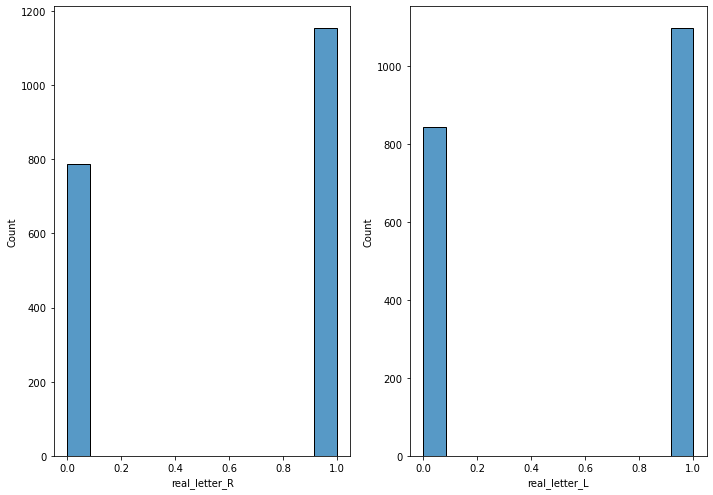

In [9]:
fig, ax = plt.subplots(ncols=2)
#sns.boxplot("letter_R", data=df_sort, ax=ax[0])
sns.histplot(df['real_letter_R'], ax=ax[0])
sns.histplot(df['real_letter_L'], ax=ax[1])
print("df_none Count:", len(df_none))

Text(0, 0.5, '')

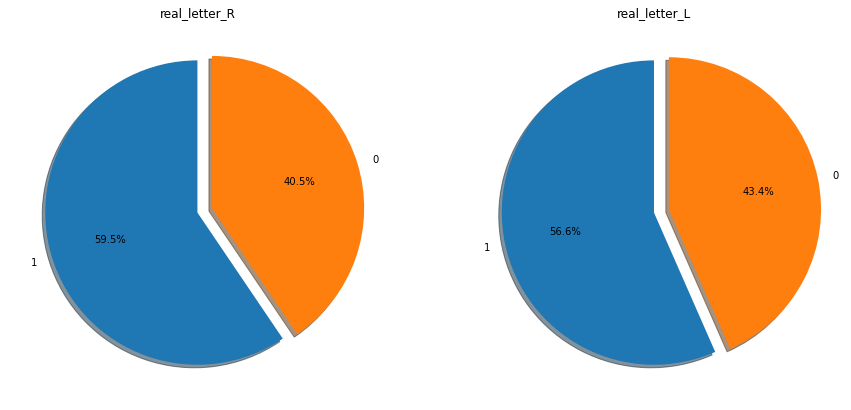

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15,7)) 
# subplot : 한 화면에서 여러 그래프를 나눠서 출력하는 기능 / plt.subplots((행 ,열, 그래프의 크기(가로, 세로)))
df_answer['real_letter_R'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True,startangle=90)
# pd.Series.value_counts() : 유일한 값 별로 개수 세기 / .pie (explode = 두 조각간의 거리, autopct = 각 범주가 데이터에서 차지하는 비율, shadow = 그림자, startangle = pie의 시작각도)
ax[0].set_title('real_letter_R') # 파이 그래프 이름
ax[0].set_ylabel('') # 파이 그래프
 
df_answer['real_letter_L'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[1],shadow=True,startangle=90)
# pd.Series.value_counts() : 유일한 값 별로 개수 세기 / .pie (explode = 두 조각간의 거리, autopct = 각 범주가 데이터에서 차지하는 비율, shadow = 그림자, startangle = pie의 시작각도)
ax[1].set_title('real_letter_L') # 파이 그래프 이름
ax[1].set_ylabel('') # 파이 그래프

# 0 = 죽음, 1 = 생존
# 61.6%가 죽음 38.4%가 생존



In [11]:
pd.crosstab(df_answer['real_letter_R'], df_answer['real_letter_L'], margins=True).style.background_gradient(cmap='summer_r')

real_letter_L,0,1,All
real_letter_R,,,
0,47,740,787
1,796,359,1155
All,843,1099,1942


In [12]:
df_pred = pd.read_csv('predict_addL.csv')
df_pred = df_pred.drop(['Unnamed: 0'], axis = 1)
df_pred.head(5)


,file_name,right_medial_x,right_medial_y,right_f_x,right_f_y,left_medial_x,left_medial_y,left_f_x,left_f_y,letter_R_x,letter_R_y,letter_L_x,letter_L_y,right_medial_prob,right_f_prob,left_medial_prob,left_f_prob,letter_R_prob,letter_L_prob
0,2678,888,838,526,1172,1306,810,1724,1172,80,141,1975,197,0.978784,0.954777,0.968929,0.969778,0.910735,0.993796
1,2028,593,852,135,1173,1166,852,1601,1127,20,806,1716,737,0.929329,0.996426,0.992047,0.921754,0.989072,0.414018
2,2017,1549,1409,675,1992,2423,1409,3346,1992,140,2575,4099,753,0.958525,0.975235,0.977456,0.984943,0.957882,0.251200
3,1970,1646,1409,820,1992,1889,1361,2714,1992,189,243,4099,753,0.976387,1.001702,0.889763,0.949375,0.943516,0.156647
4,2005,610,754,220,1061,1474,754,1864,1088,-211,1548,2003,949,0.970071,0.974106,0.972915,0.949384,0.107643,0.928070


In [14]:
#df_pred['file_name'] = temp
df_pred = df_pred.sort_values(by = 'file_name', ascending = True)
df_pred.head()

,file_name,right_medial_x,right_medial_y,right_f_x,right_f_y,left_medial_x,left_medial_y,left_f_x,left_f_y,letter_R_x,letter_R_y,letter_L_x,letter_L_y,right_medial_prob,right_f_prob,left_medial_prob,left_f_prob,letter_R_prob,letter_L_prob
454,1943,839,865,392,1181,1207,865,1655,1234,-252,-252,1944,1102,0.950554,0.946186,0.982407,0.982963,0.077906,0.953342
335,1944,1003,942,548,1235,1490,942,2010,1202,94,1689,2740,504,0.985285,0.975298,0.963610,0.971712,0.991289,0.268584
417,1945,777,1061,415,1311,1278,1061,1696,1311,52,1423,2003,1200,0.970455,0.964719,0.953169,0.983693,0.988391,0.908403
724,1946,990,1104,401,1509,1800,1141,2352,1546,2684,368,2684,368,0.980893,0.989219,0.957978,0.998329,0.202019,0.991604
676,1947,916,1141,364,1546,1874,1178,2463,1620,-3,2209,2684,184,0.989131,0.957298,0.963528,0.992729,0.895871,0.987462


In [15]:
name_pred = list(df_pred['file_name'])
df_pred['middle'] = (df_pred['right_medial_x'] + df_pred['left_medial_x'])/2
middle_pred = list(map(int, df_pred['middle']))

In [16]:
r_prob_pred = list(df_pred['letter_R_prob'])
l_prob_pred = list(df_pred['letter_L_prob'])
right_medial_pred= list(zip(df_pred['right_medial_x'], df_pred['right_medial_y']))
left_medial_pred = list(zip(df_pred['left_medial_x'], df_pred['left_medial_y']))
right_f = list(zip(df_pred['right_f_x'], df_pred['right_f_y']))
left_f = list(zip(df_pred['left_f_x'], df_pred['left_f_y']))
right_letter = list(zip(df_pred['letter_R_x'], df_pred['letter_R_y']))
left_letter = list(zip(df_pred['letter_L_x'], df_pred['letter_L_y']))

In [17]:
letter_R_x_pred = list(df_pred['letter_R_x'])
letter_L_x_pred = list(df_pred['letter_L_x'])


In [19]:
file_view_pred = list(zip(name_pred, middle_pred, right_medial_pred, left_medial_pred, right_f, left_f, r_prob_pred, l_prob_pred, right_letter, left_letter))

In [20]:
df_pred.head(10)

,file_name,right_medial_x,right_medial_y,right_f_x,right_f_y,left_medial_x,left_medial_y,left_f_x,left_f_y,letter_R_x,letter_R_y,letter_L_x,letter_L_y,right_medial_prob,right_f_prob,left_medial_prob,left_f_prob,letter_R_prob,letter_L_prob,middle
454,1943,839,865,392,1181,1207,865,1655,1234,-252,-252,1944,1102,0.950554,0.946186,0.982407,0.982963,0.077906,0.953342,1023.0
335,1944,1003,942,548,1235,1490,942,2010,1202,94,1689,2740,504,0.985285,0.975298,0.963610,0.971712,0.991289,0.268584,1246.5
417,1945,777,1061,415,1311,1278,1061,1696,1311,52,1423,2003,1200,0.970455,0.964719,0.953169,0.983693,0.988391,0.908403,1027.5
724,1946,990,1104,401,1509,1800,1141,2352,1546,2684,368,2684,368,0.980893,0.989219,0.957978,0.998329,0.202019,0.991604,1395.0
676,1947,916,1141,364,1546,1874,1178,2463,1620,-3,2209,2684,184,0.989131,0.957298,0.963528,0.992729,0.895871,0.987462,1395.0
319,1948,813,760,392,1076,1286,707,1681,1076,76,1813,2220,1642,0.978722,0.976297,0.939136,0.977038,0.989434,0.083146,1049.5
652,1949,786,918,392,1260,1286,892,1681,1234,49,207,2220,799,0.961557,0.925835,0.950795,0.959624,0.991615,0.111605,1036.0
82,1950,938,1040,451,1397,1587,1072,2107,1429,126,423,2269,423,0.993355,0.949819,0.948724,0.998058,0.983700,0.308634,1262.5
659,1951,833,977,415,1284,1278,949,1696,1256,80,1172,2059,754,0.949674,0.980254,0.977867,0.968579,0.984176,0.997206,1055.5
464,1952,665,866,247,1144,1251,893,1641,1228,-267,-736,2031,225,0.997973,0.979980,0.972485,0.984229,0.091004,0.983851,958.0


In [26]:
answer_distance = pd.read_csv('answer_distance_addL.csv')
answer_distance['filename'] = answer_distance['filename'].add(1942)
answer_distance.head(7)

,filename,right_medial_x,right_medial_y,Y/N,right_f_x,right_f_y,Y/N.1,left_medial_x,left_medial_y,Y/N.2,left_f_x,left_f_y,Y/N.3,letter_R_x,letter_R_y,Y/N.4,letter_L_x,letter_L_y,Y/N.5
0,1943,820,834,2,372,1195,2,1214,857,2,1637,1222,2,0,0,0,1948,1091,2
1,1944,1032,936,2,530,1238,2,1489,925,2,2000,1212,2,92,1697,2,0,0,0
2,1945,807,1042,2,389,1308,2,1276,1021,2,1690,1304,2,59,1434,2,2012,1187,2
3,1946,987,1082,2,394,1516,2,1782,1116,2,2360,1544,2,0,0,0,2645,373,2
4,1947,932,1137,2,370,1547,2,1884,1156,2,2465,1599,2,0,0,0,2636,175,2
5,1948,806,741,2,392,1072,2,1277,722,2,1688,1049,2,59,1803,2,0,0,0
6,1949,788,901,2,375,1253,2,1298,880,2,1692,1241,2,44,224,2,0,0,0


In [27]:
right_x_dist_answer= list(answer_distance['right_medial_x'])
right_y_dist_answer= list(answer_distance['right_medial_y'])
right_f_x_dist_answer= list(answer_distance['right_f_x'])
right_f_y_dist_answer= list(answer_distance['right_f_y'])


In [29]:
benchmark = []
for i in range(len(right_x_dist_answer)):
    result = math.sqrt(math.pow(right_x_dist_answer[i] - right_f_x_dist_answer[i], 2) + math.pow(right_y_dist_answer[i] - right_f_y_dist_answer[i], 2))
    benchmark.append(int(result*0.1)) # 거리는 1/10

In [30]:
letter_R_x_dist_answer= list(answer_distance['letter_R_x'])
letter_R_y_dist_answer= list(answer_distance['letter_R_y'])
letter_L_x_dist_answer= list(answer_distance['letter_L_x'])
letter_L_y_dist_answer= list(answer_distance['letter_L_y'])
letter_R_x_dist_pred= list(df_pred['letter_R_x'])
letter_R_y_dist_pred= list(df_pred['letter_R_y'])
letter_L_x_dist_pred= list(df_pred['letter_L_x'])
letter_L_y_dist_pred= list(df_pred['letter_L_y'])

In [33]:
dist_R= []
for i in range(len(right_x_dist_answer)):
    result = math.sqrt(math.pow(letter_R_x_dist_answer[i] - letter_R_x_dist_pred[i], 2) + math.pow(letter_R_y_dist_answer[i] - letter_R_y_dist_pred[i], 2))
    dist_R.append(int(result))

In [34]:
dist_L= []
for i in range(len(right_x_dist_answer)):
    result = math.sqrt(math.pow(letter_L_x_dist_answer[i] - letter_L_x_dist_pred[i], 2) + math.pow(letter_L_y_dist_answer[i] - letter_L_y_dist_pred[i], 2))
    dist_L.append(int(result))

In [37]:
answer = []
answer.append(['filename','pred_letter_R', 'pred_letter_L'])

for i in range(len(name_pred)):
    temp = max(r_prob_pred[i], l_prob_pred[i])
    if (temp < 0.5):
        answer.append([name_pred[i],0,0])
    elif ((r_prob_pred[i] < 0.5) & (middle_pred[i] < letter_L_x_pred[i])):
        answer.append([name_pred[i],0,1])
    elif ((l_prob_pred[i] < 0.5) & (middle_pred[i] > letter_R_x_pred[i])):
        answer.append([name_pred[i],1,0])
    else:
        answer.append([name_pred[i],1,1])


In [ ]:
#answer
with open('predict_val_0.7.csv', 'w') as file:
    write = csv.writer(file)
    write.writerows(answer)